In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [2]:
fList = []
with open("羅致政_output.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['委員', '致政', '主席', '各位', '同仁', '今天', '會期', '開議', '重要', '數字', '可是', '另外', '一個', '重要', '數字', '就是', '馬英九', '政權', '交替', '現在', '重要', '數字', '我們', '常聽到', '所謂', '破百', '破百', '就是', '準備', '退伍', '之前', '守規矩', '而且', '平穩', '準備', '退伍', '過去', '幾天', '我們', '聽到', '一個', '消息', '我們', '不得不', '憂慮', '這個', '總統', '到底', '未來', '還會', '什麼樣', '作為', '出來', '外交', '出訪', '任何', '國家', '來說', '非常', '重要', '政治', '義涵', '具有', '國際', '義涵', '行動', '最近', '傳出', '甚至', '某個', '程度', '已經', '證實', '總統', '出訪', '訊息', '不得不', '擔心', '這個', '總統', '還有', '什麼樣', '外交', '可能', '影響', '台灣', '未來', '國際', '空間', '外交', '任何', '出訪', '一定', '要求', '二個', '意義', '一個', '象徵意義', '就是', '凸顯', '我們', '邦交國', '的關', '以及', '其他', '友邦', '的關', '一個則', '實質', '意義', '就是', '雙方', '不論是', '經貿合作', '外交', '互動', '方面', '提升', '作用', '我們', '評估', '任期', '最後', '總統', '要出', '一事', '不到', '象徵意義', '無法', '達成', '實質', '意義', '尤其', '象徵意義', '幾天', '我們', '意到', '很多', '國家', '非常', '關心', '新任', '總統', '外交', '動向', '換句話說', '即將', '離任', '總統', '沒有', '可以', '這個', '國家', '國際', '社會', '重要', '政策', '義涵', '象徵意義', '所以', '總統

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(18637 unique tokens: ['一事', '一些', '一任', '一個', '一個則']...)
------------------------------


In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 4), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 8), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 5), (53, 4), (54, 14), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 5), (63, 1), (64, 1), (65, 1), (66, 3), (67, 5), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 4), (81, 1), (82, 1), (83, 7), (84, 2), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 2), (93, 3), (94, 1), (95, 1), (96, 1), (97, 3), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 2), (107, 1), (108, 2), (10

In [5]:
import os

import gensim
# os.envirom.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})
mallet_path = r'//Users/Binying/mallet/bin/mallet'
#'OS(C:)/mallet-2.0.8/bin/mallet'
ldamal = gensim.models.wrappers.LdaMallet(mallet_path, id2word=dict, corpus=corpus, num_topics=20)
output = open("CkipNewsCis18850-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('委員', 0.06080206985769728), ('致政', 0.05740620957309185), ('我們', 0.05457632600258732), ('沒有', 0.01786869340232859), ('他們', 0.014311125485122898), ('主任', 0.013826002587322122), ('有沒有', 0.01164294954721863), ('這個', 0.010996119016817595), ('所以', 0.010915265200517464), ('不會', 0.009217335058214747), ('還是', 0.008247089262613196), ('主席', 0.0075194049159120315), ('你們', 0.007276843467011643), ('掌握', 0.006872574385510996), ('動作', 0.006872574385510996), ('美方', 0.006791720569210867), ('秘書', 0.006630012936610608), ('公布', 0.006630012936610608), ('但是', 0.00638745148771022), ('軍事', 0.0063065976714100904)]

strTM =  1[('委員', 0.04914756025867137), ('致政', 0.03927101704879483), ('署長', 0.017401528512639625), ('規定', 0.017401528512639625), ('各位', 0.016696061140505584), ('法律', 0.01457965902410347), ('問題', 0.012228101116990006), ('所以', 0.011875367430922986), ('你們', 0.010346854791299235), ('主席', 0.009641387419165197), ('沒有', 0.008818342151675485), ('一個', 0.007995296884185774), ('仲威', 0.00776014109347

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
lim=30; sta=3; ste=3;
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=lim, start=sta, step=ste)

Num_topics:  3  Coherence Score=  0.26696202020931276
Num_topics:  6  Coherence Score=  0.27831394902935536
Num_topics:  9  Coherence Score=  0.2932632966033945
Num_topics:  12  Coherence Score=  0.3134970982679367
Num_topics:  15  Coherence Score=  0.32715195703362077
Num_topics:  18  Coherence Score=  0.318273895148246
Num_topics:  21  Coherence Score=  0.32397416320158307
Num_topics:  24  Coherence Score=  0.32673420138112547
Num_topics:  27  Coherence Score=  0.3351589971616849


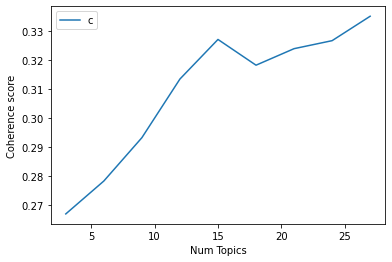

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=lim; start=sta; step=ste;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 3  has Coherence Value of 0.267
Num Topics = 6  has Coherence Value of 0.2783
Num Topics = 9  has Coherence Value of 0.2933
Num Topics = 12  has Coherence Value of 0.3135
Num Topics = 15  has Coherence Value of 0.3272
Num Topics = 18  has Coherence Value of 0.3183
Num Topics = 21  has Coherence Value of 0.324
Num Topics = 24  has Coherence Value of 0.3267
Num Topics = 27  has Coherence Value of 0.3352
Optimal Topic Num = 27  Highest Value = 0.3351589971616849


In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.052*"委員" + 0.043*"致政" + 0.036*"我們" + 0.022*"世寬" + 0.021*"司長" + '
  '0.019*"國防部" + 0.015*"正棋" + 0.010*"軍官" + 0.010*"主席" + 0.010*"可以" + '
  '0.009*"現在" + 0.009*"沒有" + 0.008*"這是" + 0.008*"報告" + 0.008*"你們" + 0.008*"國防" '
  '+ 0.008*"嚇阻" + 0.007*"數字" + 0.007*"所以" + 0.007*"戰力" + 0.006*"部分" + '
  '0.006*"次長" + 0.006*"國軍" + 0.006*"各位" + 0.006*"部隊"'),
 (1,
  '0.036*"委員" + 0.036*"我們" + 0.029*"致政" + 0.015*"產業" + 0.014*"國防" + '
  '0.013*"副部長" + 0.013*"你們" + 0.012*"主席" + 0.012*"廠商" + 0.010*"現在" + '
  '0.009*"沒有" + 0.009*"冠群" + 0.009*"一個" + 0.008*"這個" + 0.007*"部分" + 0.007*"各位" '
  '+ 0.007*"發展" + 0.007*"投資" + 0.007*"就是" + 0.007*"知道" + 0.007*"因為" + '
  '0.006*"可以" + 0.006*"所以" + 0.006*"經濟部" + 0.006*"請問"'),
 (2,
  '0.019*"問題" + 0.018*"可以" + 0.015*"我們" + 0.015*"一個" + 0.014*"學校" + 0.012*"學生" '
  '+ 0.011*"就是" + 0.011*"致政" + 0.011*"委員" + 0.011*"替代" + 0.010*"所以" + '
  '0.010*"因為" + 0.009*"人數" + 0.009*"臺灣" + 0.008*"很多" + 0.008*"部分" + 0.007*"之後" '
  '+ 0.006*"一般" + 0.006*"多少" + 0.006*"各位" + 0.006*